## Visualizations for the Dashboard

In [1]:
#import libraries
import dash
import dash_core_components as dcc
import dash_html_components as html
import plotly.graph_objects as go
import pandas as pd
import numpy as np

In [2]:
#Load data
covid = pd.read_csv("covid19.csv")
covid.tail(5)

,Country/Region,Province/State,Country/Region.1,date,Lat,Long,confirmed,deaths,recoveries
151267,Canada,NaN,Canada,8/12/21,56.1304,-106.3468,1455141,26647,0
151268,Canada,NaN,Canada,8/13/21,56.1304,-106.3468,1457458,26654,0
151269,Canada,NaN,Canada,8/14/21,56.1304,-106.3468,1458326,26658,0
151270,Canada,NaN,Canada,8/15/21,56.1304,-106.3468,1459070,26657,0
151271,Canada,NaN,Canada,8/16/21,56.1304,-106.3468,1463616,26665,0


In [18]:
#filter out max date
covid['date'] = pd.to_datetime(covid['date'])
covid_latest = covid[(covid['date'] == covid['date'].max())] 
covid_latest.head()

,Country/Region,Province/State,Country/Region.1,date,Lat,Long,confirmed,deaths,recoveries
150436,Afghanistan,NaN,Afghanistan,2021-08-16,33.93911,67.709953,152142,7025,0
150437,Albania,NaN,Albania,2021-08-16,41.15330,20.168300,136147,2466,0
150438,Algeria,NaN,Algeria,2021-08-16,28.03390,1.659600,187968,4830,0
150439,Andorra,NaN,Andorra,2021-08-16,42.50630,1.521800,14954,129,0
150440,Angola,NaN,Angola,2021-08-16,-11.20270,17.873900,44739,1103,0


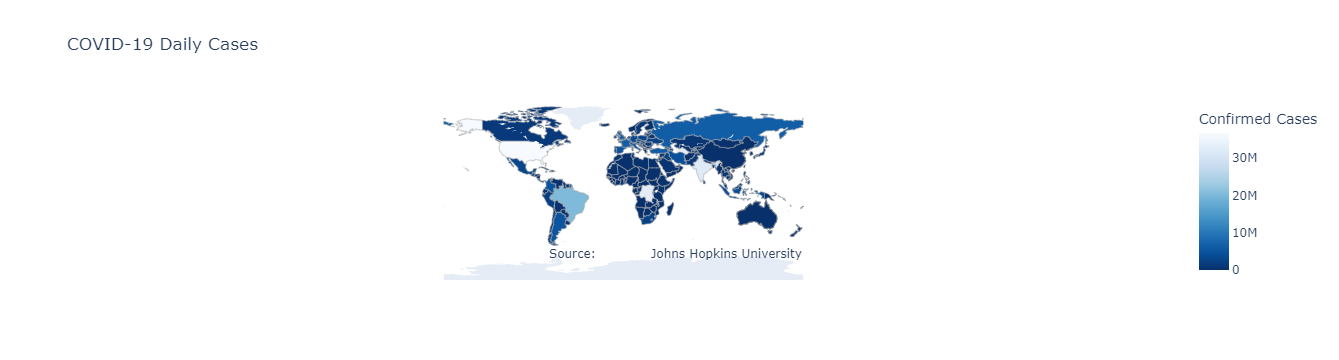

In [19]:
#Map for daily confirmed cases
fig = go.Figure(data=go.Choropleth(
    locations = covid_latest['Country/Region'],
    locationmode = 'country names', #make this reactive to whatever country is selected
    z = covid_latest['confirmed'], #will make this reactive-- input either confirmed, deaths, or recovered
    text =covid_latest['Country/Region'],
    colorscale = 'Blues',
    autocolorscale=False,
    reversescale=True,
    marker_line_color='darkgray',
    marker_line_width=0.5,
    colorbar_title = 'Confirmed Cases',
))


fig.update_layout(
    title_text='COVID-19 Daily Cases',
    geo=dict(
        showframe=False,
        showcoastlines=False,
        projection_type='equirectangular'
    ),
    annotations = [dict(
        x=0.55,
        y=0.1,
        xref='paper',
        yref='paper',
        text='Source: <a href="https://github.com/CSSEGISandData/COVID-19">\
            Johns Hopkins University </a>',
        showarrow = False
    )]
)

fig.show()

In [5]:
#initialize dash app
#app = dash.Dash()
#app.layout = html.Div([
    dcc.Graph(figure=fig)
#])

#app.run_server(debug=True, use_reloader=False)  # Turn off reloader if inside Jupyter